## Pandas Library
Pandas is a core tool for financial data processing, ideal for loading, cleaning, and analyzing data such as portfolio returns, market performance, and corporate financial statements.

In [2]:
import pandas as pd
import numpy as np 

#### Data Import and Export

In [ ]:
# Load portfolio return data
df = pd.read_csv('portfolio_returns.csv')
df.head(10)

In [ ]:
# Export data to Excel format
df.to_excel('portfolio_returns.xlsx')

#### Basic Descriptive

In [ ]:
df.head(8)        # View first 8 rows
df.dtypes         # Check column data types
df.info()         # Check data structure and missing values
df.shape          # Check data dimensions

#### Data Structures and Types

In [ ]:
# One-dimensional series
# # Create a return series
returns_series = pd.Series([0.01, 0.02, -0.01, np.nan, 0.03, 0.05])
returns_series

In [ ]:
# Create a trading days series
trading_days = pd.Series(np.arange(1, 20))
trading_days

In [ ]:
# # Create a market return series with index labels
market_returns = pd.Series(np.random.normal(0, 0.01, 5), index=['Mon', 'Tue', 'Wed', 'Thu', 'Fri'])
market_returns

In [ ]:
market_returns.values    # Get return values
market_returns.index     # Get trading days

In [ ]:
market_returns['Thu']                    # Get return for a specific day
market_returns['Mon':'Thu']              # Get returns over a date range

In [ ]:
market_returns.to_numpy()[0:3]           # Convert to NumPy array and slice

#### Creating a DataFrame

In [4]:
# Set random seed
rng = np.random.RandomState(25) 

In [ ]:
# 2 dimensional data structure
# Create a market return matrix
returns_df = pd.DataFrame(rng.normal(0, 0.01, (4, 5)))
returns_df

In [ ]:
# info()/ describe()/ shape()
returns_df.head()           # View first few rows
returns_df.shape            # Check dimensions
returns_df.describe()       # Summary statistics

In [5]:
# Create a labeled return DataFrame with custom columns and index
returns_labeled = pd.DataFrame(rng.normal(0, 0.01, (4, 5)),
                               columns=['TSMC', 'Hon Hai', 'MediaTek', 'Acer', 'Quanta'],
                               index=['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04'])
returns_labeled

,TSMC,Hon Hai,MediaTek,Acer,Quanta
2024-01-01,0.002283,0.010269,-0.008396,-0.005912,-0.009569
2024-01-02,-0.002223,-0.006199,0.018379,-0.020532,0.008686
2024-01-03,-0.009207,-0.002323,0.021530,-0.013347,0.000764
2024-01-04,-0.012461,0.012023,-0.010499,0.010566,-0.004197


In [6]:
returns_labeled.columns     # Column names
returns_labeled.index       # Index (dates)

Index(['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04'], dtype='object')

In [7]:
# # Create portfolio data
portfolio_df = pd.DataFrame({
    'A': 3.,  # Fixed investment ratio
    'B': rng.random_sample(5),  # Random returns
    'C': pd.Timestamp('2024-01-01'),  # Investment start date
    'D': np.array([0.6] * 5),  # Investment weights
    'E': pd.Categorical(['yes', 'no', 'no', 'yes', 'no']),  # Invest or not
    'F': 'Portfolio A'  # Portfolio name
})
portfolio_df

,A,B,C,D,E,F
0,3.0,0.481343,2024-01-01,0.6,yes,Portfolio A
1,3.0,0.516502,2024-01-01,0.6,no,Portfolio A
2,3.0,0.383048,2024-01-01,0.6,no,Portfolio A
3,3.0,0.997541,2024-01-01,0.6,yes,Portfolio A
4,3.0,0.514244,2024-01-01,0.6,no,Portfolio A


In [8]:
# Create investor data
investor_df = pd.DataFrame({'Name': ['Alice', 'Bob', 'Charlie'],
                            'Age': [25, 30, 35],
                            'Investment': [100000, 150000, 200000]
                            })

In [9]:
# Set investor name as index
investor_df = investor_df.set_index('Name')
investor_df

,Age,Investment
Name,,
Alice,25,100000
Bob,30,150000
Charlie,35,200000


#### Slicing

In [10]:
# Create a return matrix
returns_matrix = pd.DataFrame(rng.randint(0, 10, (5,4)),
                              index=['a','b','c','d','e'],
                              columns=['Stock', 'Bond', 'Real Estate', 'Commodity'])
returns_matrix

,Stock,Bond,Real Estate,Commodity
a,2,4,2,5
b,8,0,6,4
c,2,5,9,9
d,6,0,2,4
e,3,1,3,5


##### Columns

In [ ]:
returns_matrix['Stock']                          # Get stock returns
returns_matrix.Bond['b']                         # Get bond return for a specific date
returns_matrix.Bond['b':'d']                     # Get bond returns over a period
# returns_matrix.Stock

##### ROWS

In [ ]:
# # Use loc to get range of asset returns
returns_matrix.loc[:, 'Stock':'Real Estate']

In [ ]:
# Use loc to get returns for specific dates
returns_matrix.loc['a':'d', :]

In [ ]:
# # Use iloc for positional slicing
returns_matrix.iloc[:, 1:4]
returns_matrix.iloc[1:3, 1:4]

##### Boolean selection

In [11]:
returns_matrix

,Stock,Bond,Real Estate,Commodity
a,2,4,2,5
b,8,0,6,4
c,2,5,9,9
d,6,0,2,4
e,3,1,3,5


In [ ]:
# Filter days where stock return > 3
returns_matrix[returns_matrix.Stock > 3]

In [ ]:
# Filter where stock > 3 and real estate < 9
returns_matrix[(returns_matrix.Stock > 3) & (returns_matrix['Real Estate'] < 9)]

#### Replacing values

In [ ]:
# Replace stock returns
returns_matrix['Stock'] = [2, 5, 2, 5, 2]
returns_matrix

#### Categorical Data

In [ ]:
# Create investment decision category
investment_decision = pd.Series(['buy', 'hold', 'sell'], dtype='category')
investment_decision

In [ ]:
# Create a financial-style DataFrame
df = pd.DataFrame({ 
    'A': 3.,                                  # Risk-free rate or fixed fee (broadcasted)
    'B': rng.random_sample(5),                # Random returns or signals (5 values)
    'C': pd.Timestamp('20200512'),            # As-of date for the data
    'D': np.array([6] * 5),                   # Position size, weight, or exposure
    'E': pd.Categorical(['yes', 'no', 'no', 'yes', 'no']),  # Investment active? (flag)
    'F': 'NIH'                                # Fund name or strategy label (broadcasted)
})
df['F'].astype('category') 

#### Missing Data

In [12]:
# Create market data (with missing values)
market_data = pd.DataFrame(np.random.randn(5, 3),
                           index=['a','c','e','f','g'],
                           columns=['Technology', 'Finance', 'Manufacturing'])

# Add new columns
market_data['Utilities'] = 20
market_data['ETF'] = market_data['Technology'] > 0
market_data

,Technology,Finance,Manufacturing,Utilities,ETF
a,0.850742,-1.948897,-0.457377,20,True
c,-1.041587,-0.196668,0.782574,20,False
e,0.285086,-0.769681,-0.324873,20,True
f,-0.395497,1.688461,-0.513787,20,False
g,-0.720614,-0.545538,1.548855,20,False


In [13]:
# Reindex to simulate missing values
market_data_missing = market_data.reindex(['a','b','c','d','e','f','g'])
market_data_missing.style.applymap(lambda x: 'background-color:yellow', subset=pd.IndexSlice[['b','d'], :])

C:\Users\user\AppData\Local\Temp\ipykernel_4824\3081518625.py:3: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  market_data_missing.style.applymap(lambda x: 'background-color:yellow', subset=pd.IndexSlice[['b','d'], :])


,Technology,Finance,Manufacturing,Utilities,ETF
a,0.850742,-1.948897,-0.457377,20.000000,True
b,nan,nan,nan,nan,nan
c,-1.041587,-0.196668,0.782574,20.000000,False
d,nan,nan,nan,nan,nan
e,0.285086,-0.769681,-0.324873,20.000000,True
f,-0.395497,1.688461,-0.513787,20.000000,False
g,-0.720614,-0.545538,1.548855,20.000000,False


#### Finding Missing Values

In [14]:
# Check for missing values
market_data_missing.isna().head(10)

,Technology,Finance,Manufacturing,Utilities,ETF
a,False,False,False,False,False
b,True,True,True,True,True
c,False,False,False,False,False
d,True,True,True,True,True
e,False,False,False,False,False
f,False,False,False,False,False
g,False,False,False,False,False


In [15]:
# Check for non-missing values
market_data_missing['Technology'].notna()

a     True
b    False
c     True
d    False
e     True
f     True
g     True
Name: Technology, dtype: bool

In [16]:
# Drop rows with any missing values
market_data_missing.dropna(how='any')

,Technology,Finance,Manufacturing,Utilities,ETF
a,0.850742,-1.948897,-0.457377,20.0,True
c,-1.041587,-0.196668,0.782574,20.0,False
e,0.285086,-0.769681,-0.324873,20.0,True
f,-0.395497,1.688461,-0.513787,20.0,False
g,-0.720614,-0.545538,1.548855,20.0,False


In [17]:
# Fill missing values with column mean
filled_data2 = market_data_missing.fillna(market_data_missing.mean())
filled_data2.style.applymap(lambda x: 'background-color:yellow', subset=pd.IndexSlice[['b','d'], :])

C:\Users\user\AppData\Local\Temp\ipykernel_4824\3383503464.py:3: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  filled_data2.style.applymap(lambda x: 'background-color:yellow', subset=pd.IndexSlice[['b','d'], :])


,Technology,Finance,Manufacturing,Utilities,ETF
a,0.850742,-1.948897,-0.457377,20.000000,True
b,-0.204374,-0.354465,0.207079,20.000000,0.400000
c,-1.041587,-0.196668,0.782574,20.000000,False
d,-0.204374,-0.354465,0.207079,20.000000,0.400000
e,0.285086,-0.769681,-0.324873,20.000000,True
f,-0.395497,1.688461,-0.513787,20.000000,False
g,-0.720614,-0.545538,1.548855,20.000000,False


In [18]:
# Forward fill (suitable for time series)
forward_filled = market_data_missing.fillna(method='ffill')
forward_filled.style.applymap(lambda x: 'background-color:yellow', subset=pd.IndexSlice[['b','d'], :])
forward_filled

C:\Users\user\AppData\Local\Temp\ipykernel_4824\3815340413.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  forward_filled = market_data_missing.fillna(method='ffill')
C:\Users\user\AppData\Local\Temp\ipykernel_4824\3815340413.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  forward_filled = market_data_missing.fillna(method='ffill')
C:\Users\user\AppData\Local\Temp\ipykernel_4824\3815340413.py:3: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  forward_filled.style.applymap(lambda x: 'background-color:yellow', subset=pd.IndexSlice[['b','d'], :])


,Technology,Finance,Manufacturing,Utilities,ETF
a,0.850742,-1.948897,-0.457377,20.0,True
b,0.850742,-1.948897,-0.457377,20.0,True
c,-1.041587,-0.196668,0.782574,20.0,False
d,-1.041587,-0.196668,0.782574,20.0,False
e,0.285086,-0.769681,-0.324873,20.0,True
f,-0.395497,1.688461,-0.513787,20.0,False
g,-0.720614,-0.545538,1.548855,20.0,False


In [19]:
# Backward fill
backward_filled = market_data_missing.fillna(method='bfill')
backward_filled.style.applymap(lambda x: 'background-color:yellow', subset=pd.IndexSlice[['b','d'], :])
backward_filled

C:\Users\user\AppData\Local\Temp\ipykernel_4824\3695790408.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  backward_filled = market_data_missing.fillna(method='bfill')
C:\Users\user\AppData\Local\Temp\ipykernel_4824\3695790408.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  backward_filled = market_data_missing.fillna(method='bfill')
C:\Users\user\AppData\Local\Temp\ipykernel_4824\3695790408.py:3: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  backward_filled.style.applymap(lambda x: 'background-color:yellow', subset=pd.IndexSlice[['b','d'], :])


,Technology,Finance,Manufacturing,Utilities,ETF
a,0.850742,-1.948897,-0.457377,20.0,True
b,-1.041587,-0.196668,0.782574,20.0,False
c,-1.041587,-0.196668,0.782574,20.0,False
d,0.285086,-0.769681,-0.324873,20.0,True
e,0.285086,-0.769681,-0.324873,20.0,True
f,-0.395497,1.688461,-0.513787,20.0,False
g,-0.720614,-0.545538,1.548855,20.0,False


#### Concatenation of data sets

In [20]:
# Create multiple portfolio return datasets
portfolio1 = pd.DataFrame({'A': [f'A{i}' for i in range(4)],
                            'B': [f'B{i}' for i in range(4)],
                            'C': [f'C{i}' for i in range(4)],
                            'D': [f'D{i}' for i in range(4)]})

portfolio2 = pd.DataFrame({'A': [f'A{i}' for i in range(4,8)],
                            'B': [f'B{i}' for i in range(4,8)],
                            'C': [f'C{i}' for i in range(4,8)],
                            'D': [f'D{i}' for i in range(4,8)]})

portfolio3 = pd.DataFrame({'A': [f'A{i}' for i in range(8,12)],
                            'B': [f'B{i}' for i in range(8,12)],
                            'C': [f'C{i}' for i in range(8,12)],
                            'D': [f'D{i}' for i in range(8,12)]})

#### Adding Rows

In [21]:
portfolio1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [22]:
portfolio2

,A,B,C,D
0,A4,B4,C4,D4
1,A5,B5,C5,D5
2,A6,B6,C6,D6
3,A7,B7,C7,D7


In [23]:
# Concatenate portfolios (vertically)
combined_portfolios = pd.concat([portfolio1, portfolio2, portfolio3])
combined_portfolios

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
0,A4,B4,C4,D4
1,A5,B5,C5,D5
2,A6,B6,C6,D6
3,A7,B7,C7,D7
0,A8,B8,C8,D8
1,A9,B9,C9,D9


#### Adding columns

In [24]:
# Add a new investment
new_investment = pd.Series(['n1','n2','n3','n4'])
pd.concat([portfolio1, new_investment])

,A,B,C,D,0
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
0,NaN,NaN,NaN,NaN,n1
1,NaN,NaN,NaN,NaN,n2
2,NaN,NaN,NaN,NaN,n3
3,NaN,NaN,NaN,NaN,n4


In [25]:
# Concatenate horizontally (add assets)
pd.concat([portfolio1, portfolio2, portfolio3], axis=1)

,A,B,C,D,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,A4,B4,C4,D4,A8,B8,C8,D8
1,A1,B1,C1,D1,A5,B5,C5,D5,A9,B9,C9,D9
2,A2,B2,C2,D2,A6,B6,C6,D6,A10,B10,C10,D10
3,A3,B3,C3,D3,A7,B7,C7,D7,A11,B11,C11,D11


#### DataFrame Join

In [ ]:
# Investment assets and market index data
investment1 = pd.DataFrame({"Stock": ["TSMC", "MediaTek", "Hon Hai", "Hon Hai", "Quanta", "Acer"],
                             "Return": range(6)})
investment2 = pd.DataFrame({"Index": ["MediaTek", "Hon Hai", "Acer", "ASUS"],
                             "Index Return": range(4)})

In [ ]:
investment1

In [ ]:
investment2

In [ ]:
# Inner join
pd.merge(investment1, investment2, left_on="Stock", right_on="Index")

In [ ]:
# Left join
pd.merge(investment1, investment2, left_on="Stock", right_on="Index", how='left')

In [ ]:
# Right join
pd.merge(investment1, investment2, left_on="Stock", right_on="Index", how='right')

### Group

In [ ]:
# Create investment category and return data
investment_data = {
    'Category': ['Technology', 'Finance', 'Technology', 'Finance', 'Technology', 'Finance'],
    'Return': [0.1, 0.05, 0.12, 0.03, 0.15, 0.04]
}
investment_df = pd.DataFrame(investment_data)
investment_df

In [ ]:
# Group by category
grouped = investment_df.groupby('Category')
grouped.describe()

In [ ]:
# Calculate mean return
mean_returns = grouped.mean()
mean_returns

In [ ]:
# Calculate total return and count
investment_df.groupby('Category').agg({'Return': ['sum', 'count']})

In [ ]:
# Create investor data
gender = ["Male", "Female"]
data = pd.DataFrame({
    "Height": np.random.randint(150, 190, 100),
    "Weight": np.random.randint(40, 90, 100),
    "Gender": [gender[x] for x in np.random.randint(0, 2, 100)]
})
data

In [ ]:
# map() method by row, M--> 1, F-->0
# Map gender to numeric
data["Gender"] = data["Gender"].map({"Male": 1, "Female": 0})
data

#### Binning and Grouping

In [26]:
# Create loan data
loan_data = {
    "Loanee_names": ["Jones", "Smith", "Lynn", "Rebbeca", "Vizon", "Phylis", "Roberto", "Sypla", "Fernado", "Eric", "Michale", "Fredrick", "Allan", "Mary", "Joseph"],
    "Loan_amount": [10000, 20000, 1000, 500, 700, 850, 900, 1500, 12000, 16000, 1350, 16000, 8000, 7500, 850]
}
loan_df = pd.DataFrame(data=loan_data)

In [27]:
# Divide loan amounts into three bins
labels = ['Low', 'Medium', 'High']
loan_df['Loan_Risk'] = pd.qcut(loan_df['Loan_amount'], q=3, precision=1, labels=labels)
loan_df['Loan_Risk'].value_counts()

Loan_Risk
Low       5
Medium    5
High      5
Name: count, dtype: int64

#### Randomization (Shuffling Data)

In [ ]:
# Create investment return matrix
returns_df = pd.DataFrame(np.random.randn(10,5),
                          index=np.sort(np.random.randint(0, 100, size=10)),
                          columns=list('ABCDE'))
returns_df

In [ ]:
# Randomly shuffle the rows
returns_df.loc[np.random.permutation(returns_df.index)]

### Pivot Tables

In [29]:
# Create investment return data
investment_data = {
    'Asset': ['Technology', 'Finance', 'Manufacturing', 'Technology', 'Finance', 'Manufacturing'],
    'Period': ['Q1', 'Q2', 'Q1', 'Q2', 'Q1', 'Q2'],
    'Return': [0.05, 0.04, 0.06, 0.03, 0.07, 0.02],
    'Risk': [1, 2, 3, 4, 5, 6]
}
investment_df = pd.DataFrame(investment_data)
investment_df

,Asset,Period,Return,Risk
0,Technology,Q1,0.05,1
1,Finance,Q2,0.04,2
2,Manufacturing,Q1,0.06,3
3,Technology,Q2,0.03,4
4,Finance,Q1,0.07,5
5,Manufacturing,Q2,0.02,6


In [30]:
# Create pivot table with Asset and Period
investment_pivot = investment_df.pivot(index='Asset', columns='Period')
investment_pivot

Return       Risk   
Period            Q1    Q2   Q1 Q2
Asset                             
Finance         0.07  0.04    5  2
Manufacturing   0.06  0.02    3  6
Technology      0.05  0.03    1  4

In [31]:
# Create multi-level pivot table
investment_pivot_multi = investment_df.pivot(index='Asset', columns='Period', values=['Return', 'Risk'])
investment_pivot_multi

Return       Risk     
Period            Q1    Q2   Q1   Q2
Asset                               
Finance         0.07  0.04  5.0  2.0
Manufacturing   0.06  0.02  3.0  6.0
Technology      0.05  0.03  1.0  4.0

## Additional Information

### Backtesting

Backtesting is a way of analysing the potential performance of a trading strategy by applying it to sets of real-world, historical data. Backtesting relies on the idea that strategies which produced good results on past data will likely perform well in current and future market conditions. Therefore, by trying out trading plans on previous datasets that closely relate to current prices, regulations and market conditions, we can test how well they perform before making a trade.

In [32]:
import pandas as pd
import numpy as np
import yfinance as yf
df = yf.download("2330.tw", # ^TWII
                 start="2023-01-01",
                 end="2030-12-31",
                 progress=False)

C:\Users\user\AppData\Local\Temp\ipykernel_4824\2123019282.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("2330.tw", # ^TWII


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cycler
colors = cycler('color',
                ['#669FEE', '#66EE91', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('figure', facecolor='#313233')
plt.rc('axes', facecolor="#313233", edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors,
       labelcolor='gray')
plt.rc('grid', color='474A4A', linestyle='solid')
plt.rc('xtick', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('legend', facecolor="#313233", edgecolor="#313233")
plt.rc("text", color="#C9C9C9")

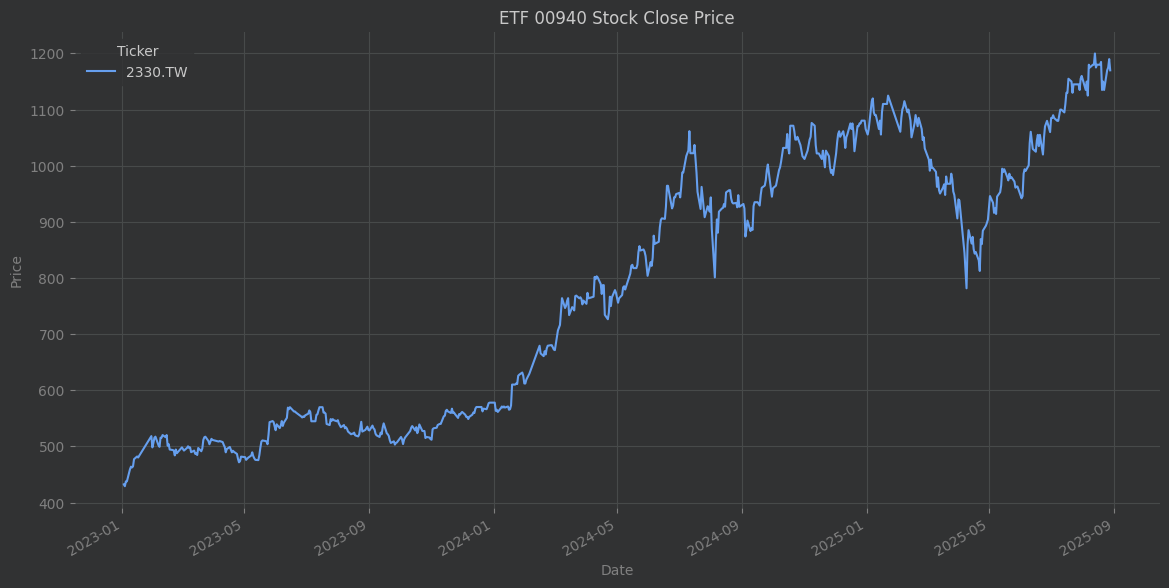

In [34]:
import matplotlib.pyplot as plt
df['Close'].plot(figsize=(14,7))
plt.title('ETF 00940 Stock Close Price')
plt.ylabel('Price')
plt.show()

#### Moving Average trading Strategy
最基本的均線(Moving Average)判斷，設定短日均線(20日)和長日均線(50日)


1. 當短日均線往上走超過長日均線時，表示股票進入上漲的趨勢，這時就選擇買進。

2. 而當短日均線又再度與長日均線交叉時，表示股票開始下跌

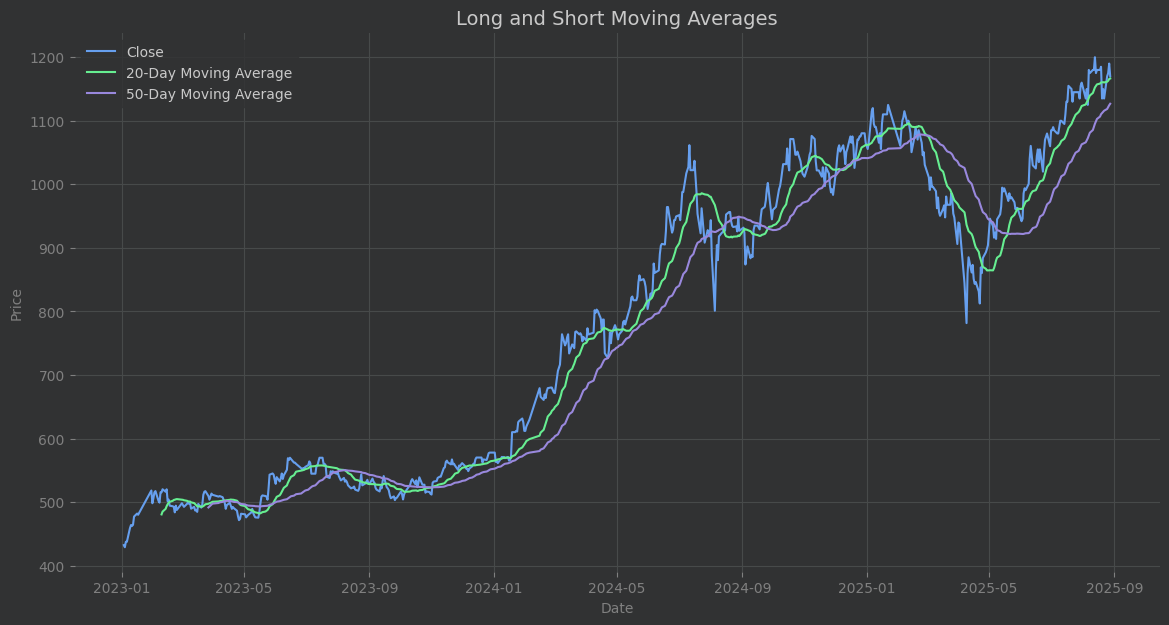

In [35]:
# Define long and short window
short_window = 20
long_window = 50

# Calculate moving averages
df['short_mavg'] = df['Close'].rolling(short_window).mean()
df['long_mavg'] = df['Close'].rolling(long_window).mean()

# Plot close price and moving averages
# plot_data = data[-500:]
plt.figure(figsize=(14, 7))
plt.title('Long and Short Moving Averages', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(df['Close'], label='Close')
plt.plot(df['short_mavg'], label='20-Day Moving Average')
plt.plot(df['long_mavg'], label='50-Day Moving Average')
plt.legend()

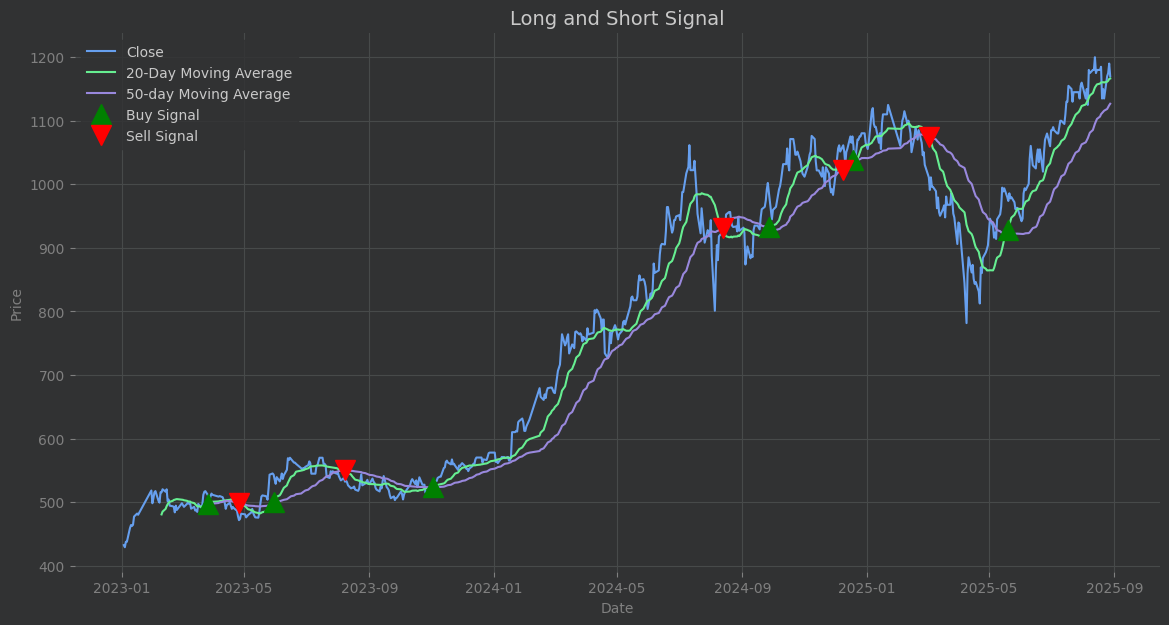

In [36]:
# Take long positions
df['Buy_Signal'] = np.where(df['short_mavg'] > df['long_mavg'], 1, 0)
# Take short positions
df['Sell_Signal'] = np.where(df['short_mavg'] < df['long_mavg'], -1, 0)
# 這個厲害
df['positions'] = df['Buy_Signal'] + df['Sell_Signal']

# Plot close price and moving averages
# plot_data = data[-3000:]
plt.figure(figsize=(14, 7))
plt.title('Long and Short Signal', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(df['Close'], label='Close')
plt.plot(df['short_mavg'], label='20-Day Moving Average')
plt.plot(df['long_mavg'], label='50-day Moving Average')

# 何時 買進, 原本平倉時
# 
plt.plot(df[(df['Buy_Signal'] == 1) & (df['Buy_Signal'].shift(1) == 0)]['short_mavg'], 
         '^', ms=15, label='Buy Signal', color='green')
# 何時 賣出, 原本平倉時
# 
plt.plot(df[(df['Sell_Signal'] == -1) & (df['Sell_Signal'].shift(1) == 0)]['short_mavg'],
         'v', ms=15, label='Sell Signal', color='red')

plt.legend()
plt.show()

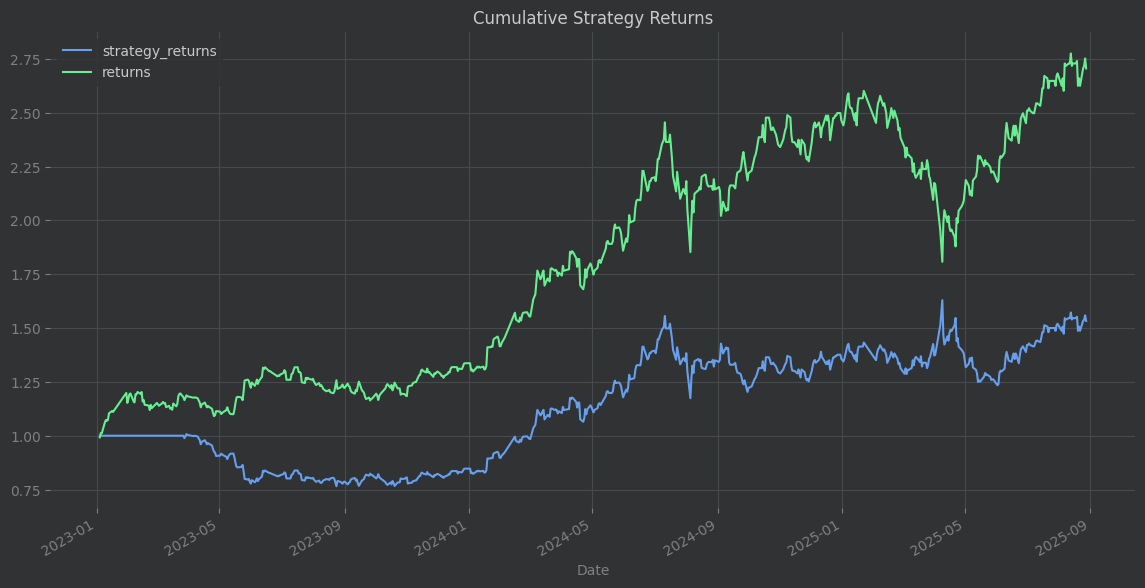

In [37]:
# Calculate daily returns
df['returns'] = df['Close'].pct_change()

# Calculate strategy returns
df['strategy_returns'] = df['returns'] * df['positions'].shift(1)

# Plot cumulative returns
Buy_n_hold_returns = (df['returns'] + 1).cumprod()
cumulative_returns = (df['strategy_returns'] + 1).cumprod()
cumulative_returns.plot(figsize=(14, 7))
Buy_n_hold_returns.plot()
plt.title('Cumulative Strategy Returns')
plt.legend()
plt.show()

#### Drawdown
Max drawdown(簡稱MDD)的中文是最大回檔幅度，又稱最大交易回落、最大交易回撤，意思是指帳戶淨值從最高點到最低點的滑落程度，通常會以百分比顯示。
知道MDD的意義在於：讓我們知道從任一時間點進場可能遇到的最糟狀況。

**MDD的計算公式 = (最高時期價值 – 最低時期價值) ÷ 最高時期價值**

舉例來說，假設你的投資組合最高時期價值是100萬，最低時期價值是50萬，那MDD就是 = (100萬 – 50萬) ÷ 100萬 = 50%. 也就是說，你的投資組合在最糟的狀況下，會損失50%的價值。

In [38]:
# Total number of trading days
days = len(cumulative_returns)

# Calculate compounded annual growth rate
# We will use 252 instead of 365, as the number of trading days in a year is 252

annualised_returns = (cumulative_returns.iloc[-1]**(252/days)-1)*100

# Calculate annualised volatility
annualised_volatility = np.std(df.strategy_returns)*(252**0.5)*100

#Assume an average annual risk-free rate is 1%
risk_free_rate = 0.01/252
sharpe_ratio = np.sqrt(252)*(np.mean(df.strategy_returns) -
(risk_free_rate))/np.std(df.strategy_returns)

# Calculate the running maximum
running_max = np.maximum.accumulate(cumulative_returns.dropna())
# Ensure the value never drops below 1
running_max[running_max < 1] = 1

# Calculate the percentage drawdown
drawdown = (cumulative_returns)/running_max - 1
max_dd = drawdown.min()*100
print('Annualised returns of strategy is %.2f' % annualised_returns + '%')
print('The annualised_volatility is', annualised_volatility)
print('The risk free rate is', risk_free_rate)
print('The sharpe ratio is', sharpe_ratio)
print('The maximum drawdown is', max_dd)

Annualised returns of strategy is 18.35%
The annualised_volatility is 29.73384002558746
The risk free rate is 3.968253968253968e-05
The sharpe ratio is 0.6829192492643141
The maximum drawdown is -24.53703448180701
